In [8]:
import sys
sys.path.append('/home/kai/DAST/network')
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import torch.utils.data.dataloader as Data
import os
import time
from torch.autograd import Variable
from DAST_utils import *
from DAST_Network import *
from torch.utils.data import TensorDataset,DataLoader
import sys
from tqdm import tqdm
import math
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [34]:
class FeatureImportance:
    def __init__(self, FOLDER) -> None:
        self.DATA_PATH = '../../../data/10FEMTO/processed_data/'
        self.FOLDER = FOLDER
        self.X = np.load(f'{self.DATA_PATH}/{FOLDER}/{FOLDER}_train_X.npy')[:, 0, :]
        self.Y = np.load(f'{self.DATA_PATH}/{FOLDER}/{FOLDER}_train_Y.npy')
        self.LABEL = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','y']
        
    def regressor(self):
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(self.X, self.Y)
        feat_dict= {}
        for col, val in sorted(zip(self.LABEL, rf_model.feature_importances_),key=lambda x:x[1],reverse=True):
            feat_dict[col]=val
        feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
        print(feat_df)
        values = feat_df.Importance    
        idx = feat_df.Feature
        plt.figure(figsize=(10,8))
        clrs = ['green' if (x < max(values)) else 'red' for x in values ]
        sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
        plt.show()
        return feat_dict

In [42]:
f = FeatureImportance(f'Bearing1_1')

In [ ]:
feat_dict = f.regressor()


   Feature  Importance
0       16    0.800652
1        5    0.086483
2        6    0.066849
3        9    0.018431
4        2    0.004591
5       15    0.004026
6       10    0.004003
7       11    0.003827
8        4    0.001876
9        1    0.001758
10       7    0.001744
11       8    0.001741
12      13    0.001157
13      12    0.001073
14       3    0.001014
15      14    0.000775


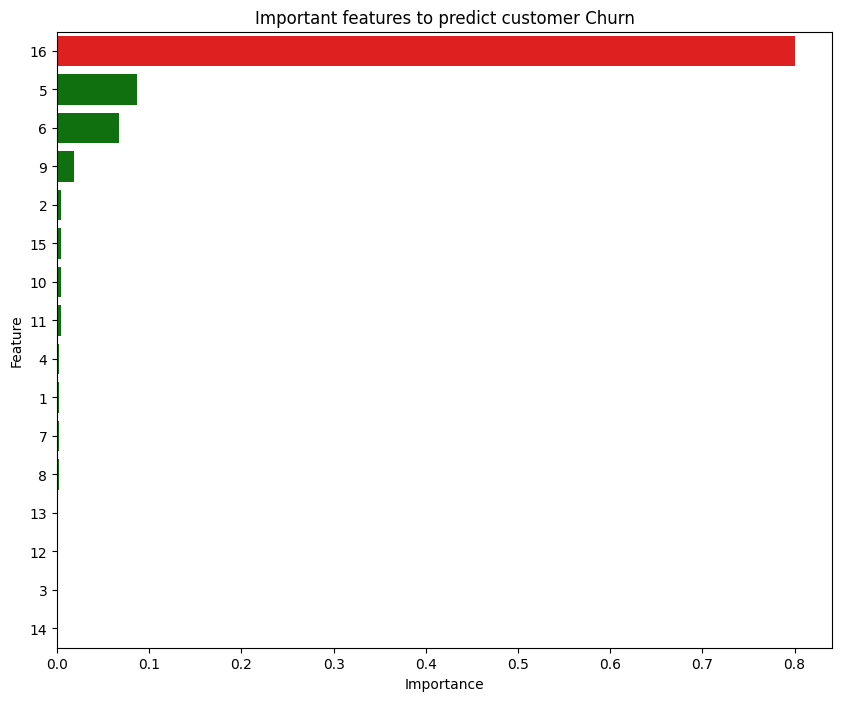

   Feature  Importance
0       16    0.800652
1        5    0.086483
2        6    0.066849
3        9    0.018431
4        2    0.004591
5       15    0.004026
6       10    0.004003
7       11    0.003827
8        4    0.001876
9        1    0.001758
10       7    0.001744
11       8    0.001741
12      13    0.001157
13      12    0.001073
14       3    0.001014
15      14    0.000775
   Feature  Importance
0       16    0.188102
1       15    0.161469
2        5    0.119363
3        6    0.114776
4       11    0.089066
5       10    0.075314
6        9    0.075254
7        4    0.034001
8       12    0.026092
9        2    0.022830
10       1    0.021062
11      13    0.019932
12       8    0.015140
13       7    0.013499
14      14    0.013142
15       3    0.010958


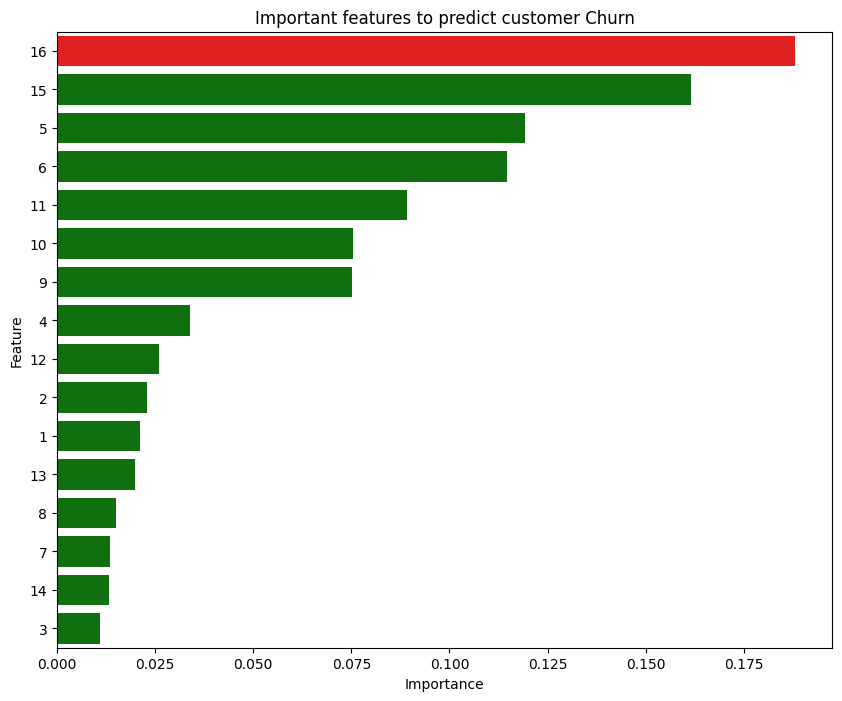

   Feature  Importance
0       16    0.188102
1       15    0.161469
2        5    0.119363
3        6    0.114776
4       11    0.089066
5       10    0.075314
6        9    0.075254
7        4    0.034001
8       12    0.026092
9        2    0.022830
10       1    0.021062
11      13    0.019932
12       8    0.015140
13       7    0.013499
14      14    0.013142
15       3    0.010958
   Feature  Importance
0       16    0.568888
1        6    0.167141
2        5    0.145175
3        9    0.072440
4       15    0.016645
5        1    0.008616
6        2    0.007277
7        4    0.003223
8       14    0.003121
9        3    0.002488
10      11    0.001278
11      10    0.001199
12      13    0.000690
13       8    0.000679
14      12    0.000655
15       7    0.000486


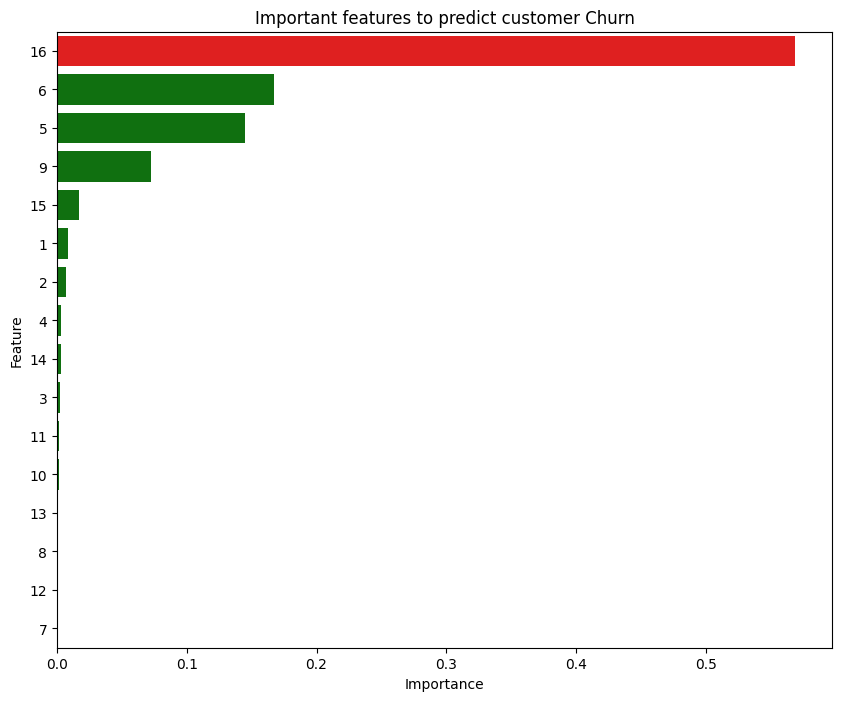

   Feature  Importance
0       16    0.568888
1        6    0.167141
2        5    0.145175
3        9    0.072440
4       15    0.016645
5        1    0.008616
6        2    0.007277
7        4    0.003223
8       14    0.003121
9        3    0.002488
10      11    0.001278
11      10    0.001199
12      13    0.000690
13       8    0.000679
14      12    0.000655
15       7    0.000486


In [48]:
feat_1 = None
feat_2 = None
feat_4= None
feat = {
    1: feat_1,
    2: feat_2,
    4: feat_4
}
for i in [1, 2, 4]:
    f = FeatureImportance(f'Bearing1_{i}')
    feat_dict = f.regressor()
    feat[i] = feat_dict
    print(feat[i])

In [50]:
merged_df = pd.concat([feat[1], feat[2], feat[4]], ignore_index=True)

# Sum the 'Importance' column based on the 'FEATURE' column
result_df = merged_df.groupby('Feature')['Importance'].sum().reset_index()

In [56]:
result_df.sort_values(by=['Importance'], ascending=False).reset_index(drop=True)

,Feature,Importance
0,16,1.557642
1,5,0.351021
2,6,0.348766
3,15,0.182140
4,9,0.166125
5,11,0.094172
6,10,0.080516
7,4,0.039100
8,2,0.034698
9,1,0.031436
